# Khai báo thư viện

In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Chuyển ảnh RGB sang Luminance

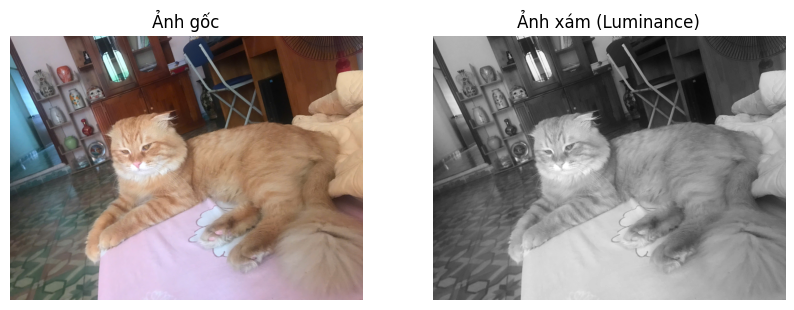

In [3]:
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image02.jpg'

if not os.path.exists(image_path):
    print(f"Ảnh không tồn tại: {image_path}")
else:
    img = Image.open(image_path).convert('RGB')
    
    img_array = np.array(img)
    
    luminance = 0.299 * img_array[:,:,0] + 0.587 * img_array[:,:,1] + 0.114 * img_array[:,:,2]
    
    luminance_img = Image.fromarray(luminance.astype(np.uint8))
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Ảnh gốc")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ảnh xám (Luminance)")
    plt.imshow(luminance_img, cmap='gray')
    plt.axis('off')

    plt.show()

    # print("Ma trận Luminance:\n", luminance)


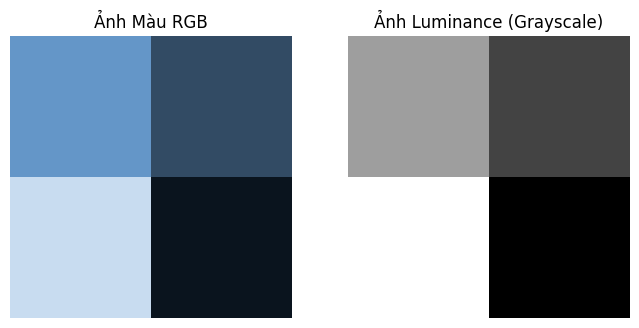

Ma trận Luminance:
 [[140.75   70.375]
 [216.3    18.15 ]]


In [4]:
image = np.array([
    [[100, 150, 200], [50, 75, 100]], 
    [[200, 220, 240], [10, 20, 30]]
], dtype=np.float32) 

# Tách các kênh màu
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

# Hiển thị ảnh RGB ban đầu
plt.figure(figsize=(8, 4))

# Ảnh gốc (RGB)
plt.subplot(1, 2, 1)
plt.imshow(image.astype(np.uint8)) 
plt.title("Ảnh Màu RGB")
plt.axis('off')

luminance = 0.299 * R + 0.587 * G + 0.114 * B

plt.subplot(1, 2, 2)
plt.imshow(luminance, cmap='gray')
plt.title("Ảnh Luminance (Grayscale)")
plt.axis('off')

plt.show()

print("Ma trận Luminance:\n", luminance)

# Tần suất mức xám của Histogram

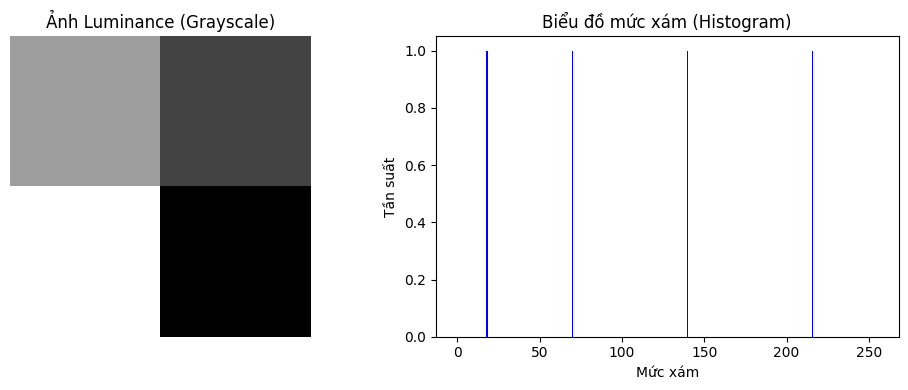

In [5]:
image = np.array([
    [[100, 150, 200], [50, 75, 100]],  # 2 pixel: R, G, B
    [[200, 220, 240], [10, 20, 30]]
], dtype=np.float32)

# Tách các kênh màu
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

luminance = 0.299 * R + 0.587 * G + 0.114 * B

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(luminance, cmap='gray')
plt.title("Ảnh Luminance (Grayscale)")
plt.axis('off')

# Tính biểu đồ mức xám
histogram = np.zeros(256, dtype=int)
for row in luminance.astype(np.uint8):  
    for pixel in row:
        histogram[pixel] += 1

# Hiển thị biểu đồ mức xám
plt.subplot(1, 2, 2)
plt.bar(range(256), histogram, color='blue')
plt.title("Biểu đồ mức xám (Histogram)")
plt.xlabel("Mức xám")
plt.ylabel("Tần suất")

plt.tight_layout()
plt.show()

# In ra các ma trận
# print("Ma trận Luminance:\n", luminance)
# print("Biểu đồ mức xám (Histogram):\n", histogram)


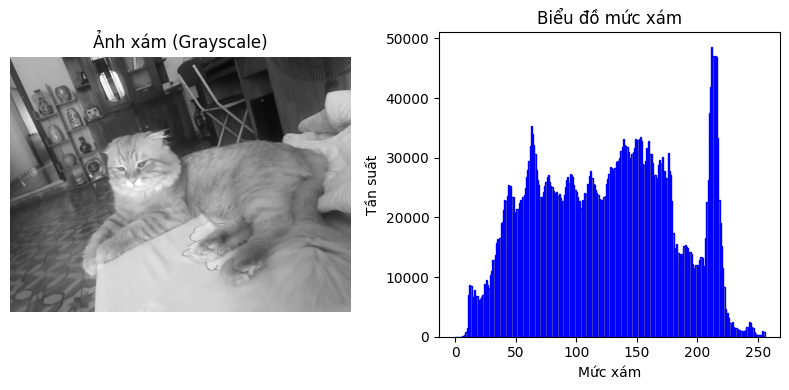

In [6]:
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image02.jpg'

if not os.path.exists(image_path):
    print(f"Ảnh không tồn tại: {image_path}")
else:
    image = cv2.imread(image_path)

    if image is None:
        print("Lỗi!!!!!!!!!!! Kiểm tra lại đường dẫn ảnh")
    else:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.title("Ảnh xám (Grayscale)")
        plt.imshow(gray_image, cmap='gray')
        plt.axis('off')

        histogram, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

        plt.subplot(1, 2, 2)
        plt.title("Biểu đồ mức xám")
        plt.xlabel("Mức xám")
        plt.ylabel("Tần suất")
        plt.bar(bins[:-1], histogram, width=1, color='gray', edgecolor='blue')

        plt.tight_layout()
        plt.show()

# CDF và hàm bù chuyển

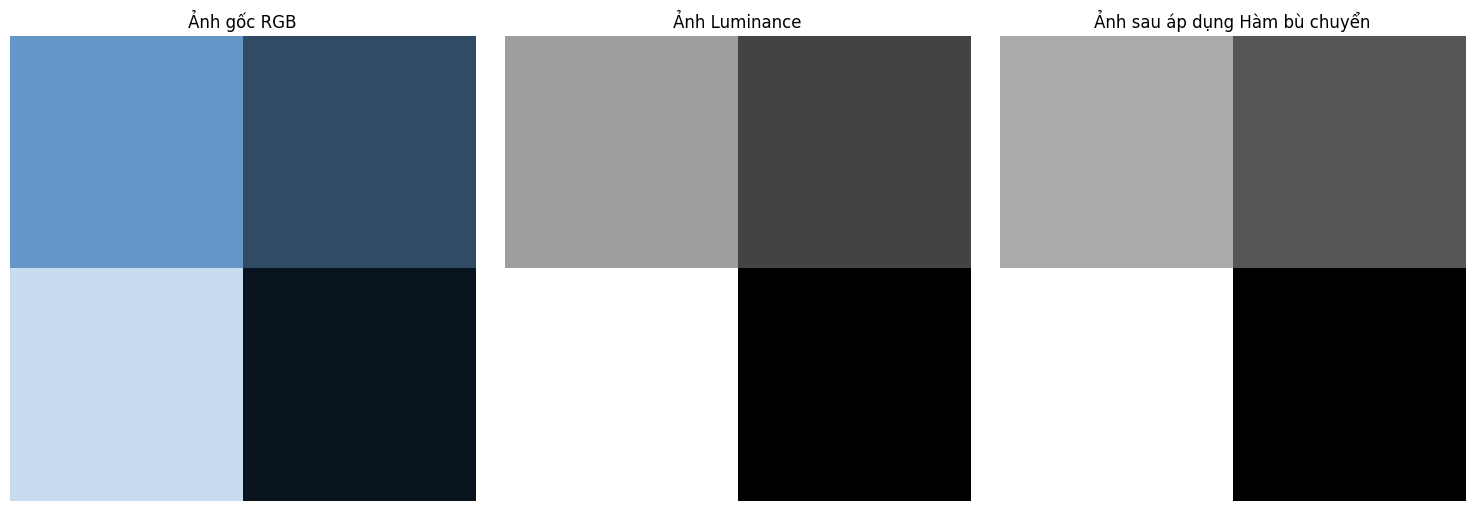

In [7]:
image = np.array([
    [[100, 150, 200], [50, 75, 100]], 
    [[200, 220, 240], [10, 20, 30]]
], dtype=np.float32)

R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

luminance = 0.299 * R + 0.587 * G + 0.114 * B

# Tính biểu đồ mức xám
histogram = np.zeros(256, dtype=int)
for row in luminance.astype(np.uint8):
    for pixel in row:
        histogram[pixel] += 1

# Tính phân phối tích lũy (CDF)
cdf = np.cumsum(histogram)
cdf_min = cdf[np.nonzero(cdf)[0][0]]  # Giá trị CDF đầu tiên khác 0
transfer_function = np.round((cdf - cdf_min) / (cdf[-1] - cdf_min) * 255).astype('uint8')

# Áp dụng hàm bù chuyển vào ảnh
equalized_luminance = np.zeros_like(luminance, dtype='uint8')
for i in range(luminance.shape[0]):
    for j in range(luminance.shape[1]):
        equalized_luminance[i, j] = transfer_function[int(luminance[i, j])]

# Hiển thị ảnh gốc RGB, Luminance và ảnh sau cân bằng histogram
plt.figure(figsize=(15, 5))

# Ảnh gốc 
plt.subplot(1, 3, 1)
plt.imshow(image.astype(np.uint8)) 
plt.title("Ảnh gốc RGB")
plt.axis('off')

# Ảnh Luminance
plt.subplot(1, 3, 2)
plt.imshow(luminance, cmap='gray')
plt.title("Ảnh Luminance")
plt.axis('off')

# Ảnh sau cân bằng histogram
plt.subplot(1, 3, 3)
plt.imshow(equalized_luminance, cmap='gray')
plt.title("Ảnh sau áp dụng Hàm bù chuyển")
plt.axis('off')

plt.tight_layout()
plt.show()

# In ra các ma trận
# print("Ma trận Luminance:\n", luminance)
# print("Biểu đồ mức xám (Histogram):\n", histogram)
# print("Hàm bù chuyển (Transfer Function):\n", transfer_function)
# print("Ma trận Luminance sau cân bằng:\n", equalized_luminance)


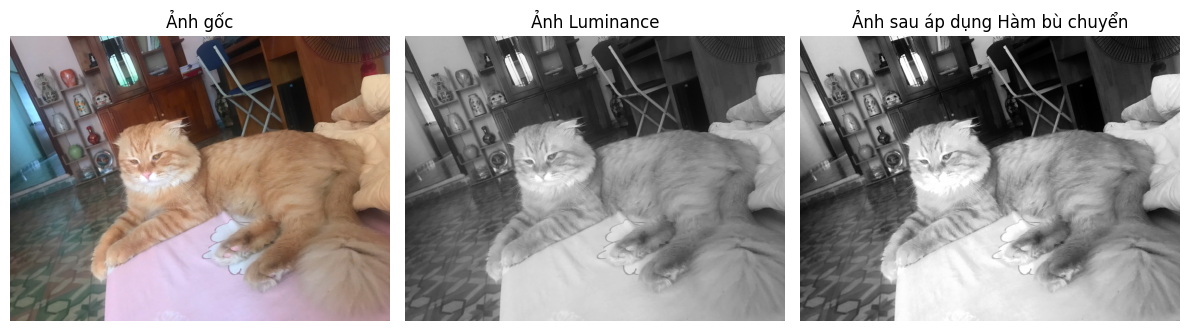

In [8]:
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image02.jpg'

image = cv2.imread(image_path)

# Kiểm tra xem ảnh có tồn tại không
if image is None:
    print("Không thể đọc ảnh từ đường dẫn:", image_path)
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    luminance = 0.299 * R + 0.587 * G + 0.114 * B

    # Tính biểu đồ mức xám
    histogram = np.zeros(256, dtype=int)
    for row in luminance.astype(np.uint8):  
        for pixel in row:
            histogram[pixel] += 1

    # Tính CDF
    cdf = np.cumsum(histogram)
    cdf_min = cdf[np.nonzero(cdf)[0][0]]  # Giá trị CDF đầu tiên khác 0
    transfer_function = np.round((cdf - cdf_min) / (cdf[-1] - cdf_min) * 255).astype('uint8')

    # Áp dụng hàm bù chuyển
    equalized_luminance = transfer_function[luminance.astype(np.uint8)]

    # Hiển thị kết quả
    plt.figure(figsize=(12, 6))
    # Ảnh gốc
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Ảnh gốc")
    plt.axis('off')

    # Ảnh Luminance ban đầu
    plt.subplot(1, 3, 2)
    plt.imshow(luminance, cmap='gray')
    plt.title("Ảnh Luminance")
    plt.axis('off')

    # Ảnh sau cân bằng histogram
    plt.subplot(1, 3, 3)
    plt.imshow(equalized_luminance, cmap='gray')
    plt.title("Ảnh sau áp dụng Hàm bù chuyển")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Tăng độ nổi bật hình ảnh

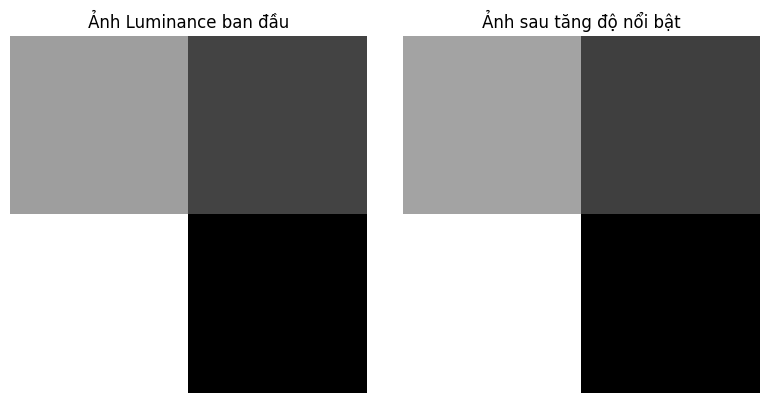

In [9]:
# Ma trận Luminance
luminance = np.array([
    [140.75, 70.375],
    [216.3, 18.15]
], dtype=np.float32)

# Bước 1: Xác định ngưỡng dưới và ngưỡng trên
p = 0.05  # Tỷ lệ 5%
L_min = np.percentile(luminance, p * 100)  # 5% giá trị nhỏ nhất
L_max = np.percentile(luminance, 100 - p * 100)  # 5% giá trị lớn nhất

# Bước 2: Ánh xạ giá trị pixel để tăng độ nổi bật
stretched_image = np.zeros_like(luminance, dtype='uint8')
for i in range(luminance.shape[0]):
    for j in range(luminance.shape[1]):
        if luminance[i, j] < L_min:
            stretched_image[i, j] = 0
        elif luminance[i, j] > L_max:
            stretched_image[i, j] = 255
        else:
            stretched_image[i, j] = ((luminance[i, j] - L_min) / (L_max - L_min)) * 255

# Hiển thị kết quả
plt.figure(figsize=(8, 4))

# Hiển thị ảnh Luminance ban đầu
plt.subplot(1, 2, 1)
plt.title("Ảnh Luminance ban đầu")
plt.imshow(luminance, cmap='gray')
plt.axis('off')

# Hiển thị ảnh sau tăng độ nổi bật
plt.subplot(1, 2, 2)
plt.title("Ảnh sau tăng độ nổi bật")
plt.imshow(stretched_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# In kết quả
# print("Ma trận Luminance:\n", luminance)
# print(f"L_min: {L_min}, L_max: {L_max}")
# print("Ma trận sau tăng độ nổi bật:\n", stretched_image)


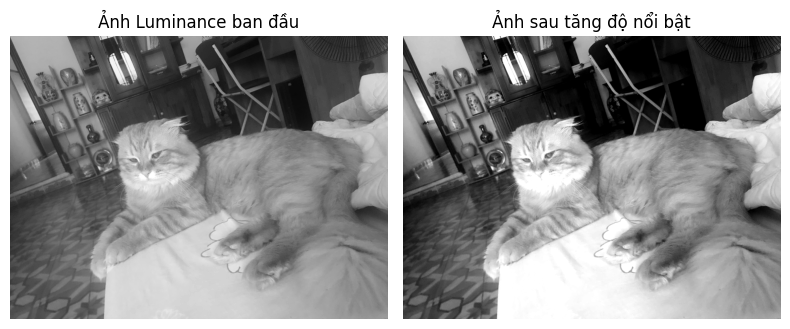

In [12]:
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image02.jpg'

# Bước 1: Đọc ảnh và chuyển đổi sang mức xám
image = cv2.imread(image_path)  # Đọc ảnh màu
if image is None:
    raise ValueError("Không thể đọc ảnh từ đường dẫn. Hãy kiểm tra lại.")
luminance = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)  # Chuyển đổi sang grayscale

# Bước 2: Xác định ngưỡng dưới và trên
p = 0.05  # Tỷ lệ 5%
L_min = np.percentile(luminance, p * 100)  # 5% giá trị nhỏ nhất
L_max = np.percentile(luminance, 100 - p * 100)  # 5% giá trị lớn nhất

# Bước 3: Ánh xạ giá trị pixel để tăng độ nổi bật
stretched_image = np.zeros_like(luminance, dtype='uint8')
for i in range(luminance.shape[0]):
    for j in range(luminance.shape[1]):
        if luminance[i, j] < L_min:
            stretched_image[i, j] = 0
        elif luminance[i, j] > L_max:
            stretched_image[i, j] = 255
        else:
            stretched_image[i, j] = ((luminance[i, j] - L_min) / (L_max - L_min)) * 255

# Bước 4: Hiển thị kết quả
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Ảnh Luminance ban đầu")
plt.imshow(luminance, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ảnh sau tăng độ nổi bật")
plt.imshow(stretched_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# In thông tin kết quả
# print(f"L_min: {L_min}, L_max: {L_max}")
